# **Prediciting Factory Machine Status**

Name: Myint Kyaw (Marcus) <br>
Admin No: 2409081 <br>
Class: DAAA/FT/1B/04

<hr>

# Projective Objective

Build a supervised machine learning model (*Classification*) to predict whether the machine is working 
properly or faulty.

<hr>

# Background

Determining if a machine is functioning properly is crucial because it ensures safety, efficiency, and cost-effectiveness. A malfunctioning machine can lead to serious safety hazards for operators and anyone nearby, particularly in industries like manufacturing, where operators have to stay close to the machine. Regular monitoring and maintenance will are key to minimize machine breakdowns.

Preventive and predictive maintenance strategies are essential to this process. Preventive maintenance schedules regular check-ups to avoid unexpected failures, while predictive maintenance uses data and analytics to detect early signs of malfunction, allowing for timely intervention. These approaches help prevent costly downtime and maintain quality and consistency in production, which is vital for meeting customer demands and maintaining trust

This is a dataset collected from a manufacturing factory. The dataset contains various 
information on different machines. From the perspective o  quality control, the factor 
wants to build a machine learning model to predict whether the machine is worki g
properly or faul

### Citations
* FieldCircle. (2024). What is Equipment Maintenance? [online] Available at: https://www.fieldcircle.com/blog/equipment-maintenance/.
* Balachandran, J. (2023). Ensuring Reliability and Efficiency: The Value of Preventive Maintenance. [online] Available at: https://www.maintwiz.com/blog/ensuring-reliability-and-efficiency-the-value-of-preventive-maintenance‌y.


<hr>

# Content

1. Importing modules and data
2. Exploratory Data Analysis
3. Data Preprocessing
4. Model Experimentation
5. Evaluating the models' performance using the testing data
6. Tuning the model for better results
7. Conclusion

<hr>

# 1. Importing modules and data

## Importing Modules

In [1]:
#Modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Processing and Imputing Data
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder

# Importing Models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Perceptron
from sklearn.naive_bayes import GaussianNB
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Cross Validation
from sklearn.model_selection import KFold
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split


# Model Evaluation
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import learning_curve
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_curve, precision_recall_curve, auc
from sklearn.metrics import classification_report
from sklearn.metrics import (balanced_accuracy_score, recall_score, f1_score, roc_auc_score, accuracy_score)
from sklearn import tree


In [2]:
#Random Seed Setting
seed = 42

## Importing Data

In [3]:
dataset = pd.read_csv('factory_data.csv', sep=',')
dataset = pd.DataFrame(dataset)
dataset

,Unique ID,Product ID,Quality,Ambient T (C),Process T (C),Rotation Speed (rpm),Torque (Nm),Tool Wear (min),Machine Status
0,1,K12965,M,24.95,35.45,1551.0,42.8,0,0
1,2,Z62710,L,25.05,35.55,1408.0,46.3,3,0
2,3,T20224,L,24.95,35.35,1498.0,49.4,5,0
3,4,Z33024,L,25.05,35.45,1433.0,39.5,7,0
4,5,Z52839,L,25.05,35.55,1408.0,40.0,9,0
...,...,...,...,...,...,...,...,...,...
19995,19996,T87335,M,25.75,35.35,NaN,29.5,14,0
19996,19997,Z59525,H,25.85,35.35,1632.0,31.8,17,0
19997,19998,T83921,M,25.95,NaN,NaN,33.4,22,0
19998,19999,K42424,H,25.95,35.65,1408.0,48.5,25,0


## Meta Data

- Unique ID: the unique identifier
- Product ID: the product ID
- Quality: the machine quality, L = low, M = medium, H = high
- Ambient T: the ambient temperature
- Process T: the process temperature
- Rotation Speed: the machine rotation speed measured in rpm (rounds per minute)
- Torque: the torque of the machine
- Tool Wear: the time of tool wear
- Machine Status: 0 means normal, 1 means abnormal

# 2. Exploratory Data Analysis

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unique ID             20000 non-null  int64  
 1   Product ID            20000 non-null  object 
 2   Quality               19009 non-null  object 
 3   Ambient T (C)         20000 non-null  float64
 4   Process T (C)         19600 non-null  float64
 5   Rotation Speed (rpm)  18812 non-null  float64
 6   Torque (Nm)           20000 non-null  float64
 7   Tool Wear (min)       20000 non-null  int64  
 8   Machine Status        20000 non-null  int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 1.4+ MB


The dataset contains 20000 rows (entries) and 9 columns (attributes)

In [5]:
dataset.isna().sum()

Unique ID                  0
Product ID                 0
Quality                  991
Ambient T (C)              0
Process T (C)            400
Rotation Speed (rpm)    1188
Torque (Nm)                0
Tool Wear (min)            0
Machine Status             0
dtype: int64

The dataset contains missing values in `Quality`, `Process T (C)` and `Rotation Speed (rpm)` columns

In [6]:
print("Number of duplicate rows:", dataset.duplicated().sum())

Number of duplicate rows: 0


The dataset contains no duplicate rows

<hr>

### Numerical Features

In [7]:
dataset.drop(["Unique ID", "Machine Status"], axis=1).describe()

,Ambient T (C),Process T (C),Rotation Speed (rpm),Torque (Nm),Tool Wear (min)
count,20000.000000,19600.000000,18812.000000,20000.000000,20000.000000
mean,26.904930,36.904291,1538.795397,39.986910,107.951000
std,2.000834,1.483647,178.674963,9.968684,63.652555
min,22.150000,32.550000,1168.000000,3.800000,0.000000
25%,25.250000,35.750000,1423.000000,33.200000,53.000000
50%,26.950000,36.950000,1503.000000,40.100000,108.000000
75%,28.450000,37.950000,1613.000000,46.800000,162.000000
max,31.450000,40.750000,2886.000000,76.600000,253.000000


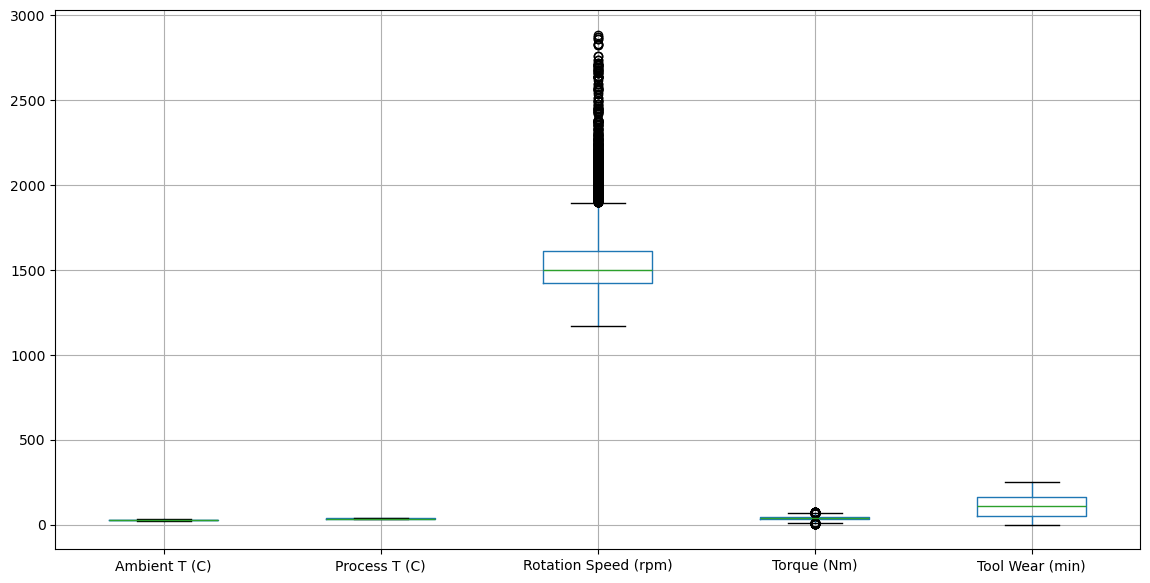

In [8]:
dataset.drop(["Unique ID", "Machine Status"], axis=1).boxplot(figsize=(14,7))
plt.show()

### Box Plot: Variation of Numerical Features

The box plot shows that there are a few outliers, especially in the `Rotation Speed` column. It is also apparent that the scales of the numerical features are different. Most features have a maximum of around 100, but `Rotation Speed` has a maximum of around 2900.

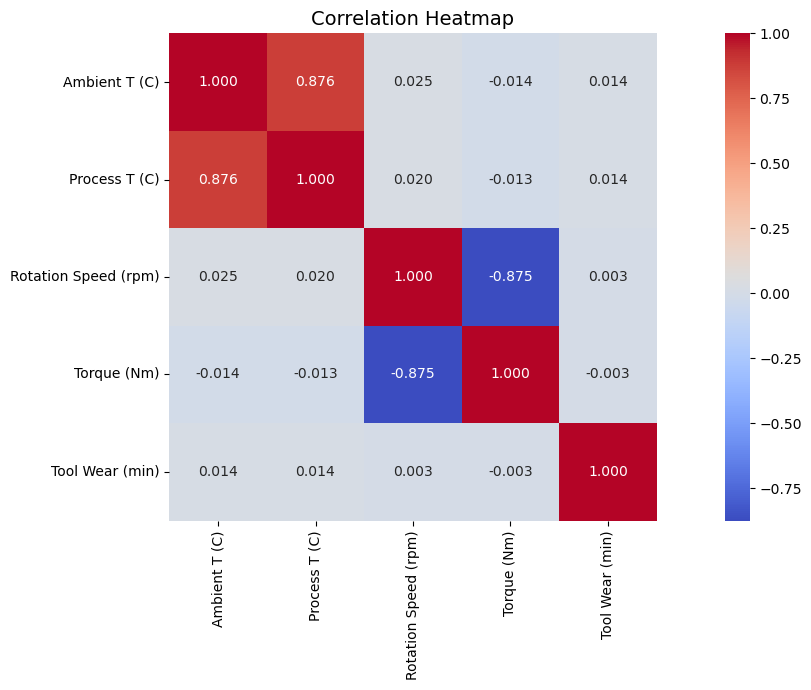

In [9]:
import seaborn as sns

# Drop non-numeric columns and calculate correlation matrix
correlation_matrix = dataset.drop(["Unique ID", "Machine Status", "Product ID", "Quality"], axis=1).corr()

# Set figure size
plt.figure(figsize=(14, 7))

# Create heatmap
sns.heatmap(correlation_matrix, 
            annot=True,        # Show correlation values
            fmt=".3f",         # Format values to 3 decimals
            cmap="coolwarm",   # Color map
            cbar=True,         # Show color bar
            square=True)       # Make cells square

plt.title("Correlation Heatmap", fontsize=14)
plt.tight_layout()
plt.show()

### Heat Map: Correlation Between Numerical Features

The heatmap shows a high correlation betweeen `Ambient Temperature` and `Process Temperature` (0.876), and between `Rotation Speed` and `Torque` (-0.875). While the others have low correlation.

<hr>

### Categorical Features

In [10]:
dataset[['Unique ID', 'Product ID', 'Quality', 'Machine Status']]

,Unique ID,Product ID,Quality,Machine Status
0,1,K12965,M,0
1,2,Z62710,L,0
2,3,T20224,L,0
3,4,Z33024,L,0
4,5,Z52839,L,0
...,...,...,...,...
19995,19996,T87335,M,0
19996,19997,Z59525,H,0
19997,19998,T83921,M,0
19998,19999,K42424,H,0


The `Unique ID` and `Product ID` does not provide any valuable information so these 2 features will not be considered and dropped.

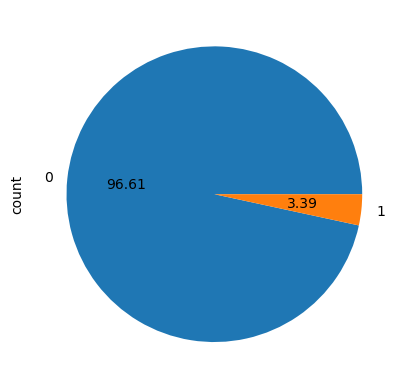

In [11]:
dataset["Machine Status"].value_counts().plot.pie(autopct="%.2f")
plt.show()

### Pie Chart: Distribution of Machine Operating Status

The Pie Chart shows that 96.61% of the total machines in the machine is operating normally and 3.39% of the total machines were operating normally.

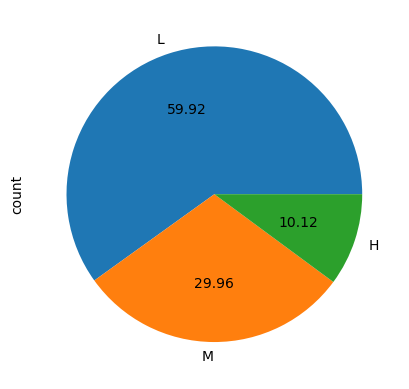

In [12]:
dataset["Quality"].value_counts().plot.pie(autopct="%.2f")
plt.show()

### Pie Chart: Distribution of Machine Quality

The Pie Chart shows that 59.92% of the machines are low quality, 29.96% of the machines are medium quality and 10.12% of the machines are high quality.

<hr>

# 3. Data Preprocessing

### Feature Engineering 

**Relationship between Ambient Temperature and Process Temperature** 

The study "Real-Time Compensation for Thermal Errors of the Milling Machine" highlights that temperature-induced thermal errors are a significant cause of machine positioning inaccuracies. It suggests that unusually high temperatures from heat sources can directly lead to operational errors, making ambient and process temperature valuable predictive features for machine performance and potential malfunctions

Formula: </br>
Temperature (°C) = Process Temperature (°C) - Ambient Temperature (°C) <br>

Source: <br>
https://www.mdpi.com/2076-3417/6/4/101°C

**Relationship between Torque and Rotation Speed** 

Torque and rotation speed can be used to show the engine power of a machine. Which could be a feature we can predict the operations of a machine with.

Formula: <br>
Power (W) = k x Torque (Nm) x Rotation Speed (rmp)

Source: <br>
https://www.linkedin.com/pulse/rpm-torque-engines-understanding-relationship-muhammad-aqib#:~:text=By%20knowing%20the%20torque%20required,will%20operate%20under%20the%20load. 

In [13]:
dataset['Temperature Difference (C)'] = dataset["Process T (C)"] - dataset["Ambient T (C)"]
dataset["Power"] = dataset["Torque (Nm)"] * dataset["Rotation Speed (rpm)"]
dataset.head()

,Unique ID,Product ID,Quality,Ambient T (C),Process T (C),Rotation Speed (rpm),Torque (Nm),Tool Wear (min),Machine Status,Temperature Difference (C),Power
0,1,K12965,M,24.95,35.45,1551.0,42.8,0,0,10.5,66382.8
1,2,Z62710,L,25.05,35.55,1408.0,46.3,3,0,10.5,65190.4
2,3,T20224,L,24.95,35.35,1498.0,49.4,5,0,10.4,74001.2
3,4,Z33024,L,25.05,35.45,1433.0,39.5,7,0,10.4,56603.5
4,5,Z52839,L,25.05,35.55,1408.0,40.0,9,0,10.5,56320.0


## Imputing, Encoding and Scaling Pipeline

In [14]:
# ----------------------
# 1. Separate features and target
# ----------------------
X = dataset.drop(["Unique ID", "Product ID", "Machine Status"], axis=1)
y = dataset["Machine Status"]

# Identify categorical and numerical columns
cat_features = ["Quality"]
num_features = [col for col in X.columns if col not in cat_features]

# ----------------------
# 2. Define transformers
# ----------------------

# For categorical: impute with mode + ordinal encode
cat_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OrdinalEncoder(categories=[["L", "M", "H"]]))  # enforce order L=0, M=1, H=2
])

# For numerical: impute with mean
num_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])

# ----------------------
# 3. Combine with ColumnTransformer
# ----------------------
preprocessor = ColumnTransformer(transformers=[
    ("num", num_transformer, num_features),
    ("cat", cat_transformer, cat_features)
])

# ----------------------
# 4. Train/test split
# ----------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

# ----------------------
# 5. Fit the preprocessor on training data
# ----------------------
preprocessor.fit(X_train)

# Get feature names from the preprocessor
feature_names = num_features + cat_features

# Convert transformed data to DataFrames with proper column names
X_train_processed = pd.DataFrame(
    preprocessor.transform(X_train),
    columns=feature_names,
    index=X_train.index
)

X_test_processed = pd.DataFrame(
    preprocessor.transform(X_test),
    columns=feature_names,
    index=X_test.index
)

In [15]:
X_train_processed

,Ambient T (C),Process T (C),Rotation Speed (rpm),Torque (Nm),Tool Wear (min),Temperature Difference (C),Power,Quality
5894,0.577091,0.580420,0.328589,-0.202329,0.883570,-0.307648,0.060941,0.0
3728,1.125974,0.851986,-0.474608,0.458438,-0.388227,-1.013806,0.495811,0.0
8958,-1.319050,-1.320541,1.114575,-1.223516,-0.592343,0.701150,-1.199668,1.0
7671,0.227802,1.055660,-0.480345,1.119206,1.338905,1.104670,1.460864,1.0
5999,0.177904,0.105180,0.753136,-0.943190,1.982655,-0.206768,-0.903678,1.0
...,...,...,...,...,...,...,...,...
11284,-0.770167,-0.302169,3.518430,-2.464959,-0.152709,1.104670,-2.722237,0.0
11964,-1.069558,-1.659999,-0.772939,0.698718,0.082809,-0.307648,0.602556,1.0
5390,1.375467,1.530900,-0.325443,0.728752,1.809941,-0.509407,1.016531,2.0
860,-1.967730,-2.135239,0.007310,-0.732946,-1.173287,0.802030,-0.977219,2.0


In [16]:
X_test_processed

,Ambient T (C),Process T (C),Rotation Speed (rpm),Torque (Nm),Tool Wear (min),Temperature Difference (C),Power,Quality
10650,-1.169355,-0.505844,0.408909,-0.682888,0.742260,1.609069,-0.665711,0.0
2041,-0.470776,-0.777409,0.804770,-1.273574,0.035706,-0.206768,-1.435335,0.0
8668,-1.269152,-0.845301,-0.216438,0.598601,0.663754,1.306429,0.910008,0.0
1114,-1.818035,-1.863673,0.001573,-0.252388,-0.513837,0.902910,-0.234706,2.0
13902,1.125974,0.784094,0.517914,-0.532713,-0.215514,-1.114686,-0.355576,0.0
...,...,...,...,...,...,...,...,...
4073,0.926380,0.376745,-0.732779,0.658671,-0.294020,-1.316446,0.578695,1.0
7442,-0.021690,0.987769,0.351538,-0.302446,-1.141885,1.508189,-0.085293,0.0
9999,-0.520675,-0.913192,-0.227912,0.027938,-1.220391,-0.307648,0.038109,1.0
1870,-0.869964,-1.388433,-0.308232,0.238182,-0.341123,-0.307648,0.296174,0.0


### Random Oversampleing to Treat Unbalanced Data

In [17]:
X_train = X_train_processed
X_test = X_test_processed

# Separate the minority and majority classes
X_majority = X_train[y_train == 0]
y_majority = y_train[y_train == 0]
X_minority = X_train[y_train == 1]
y_minority = y_train[y_train == 1]

# Calculate the number of samples needed to balance the classes
n_samples_needed = len(y_majority) - len(y_minority)

# Oversample the minority class by randomly sampling with replacement
X_minority_oversampled = X_minority.sample(n=n_samples_needed, replace=True, random_state=seed)
y_minority_oversampled = y_minority.sample(n=n_samples_needed, replace=True, random_state=seed)

# Combine the oversampled minority class with the majority class
X_balanced = pd.concat([X_majority, X_minority, X_minority_oversampled])
y_balanced = pd.concat([y_majority, y_minority, y_minority_oversampled])

# Shuffle the dataset to mix the classes
X_balanced, y_balanced = X_balanced.sample(frac=1, random_state=seed), y_balanced.sample(frac=1, random_state=seed)

# Print the new class distribution
print("Original class distribution:", y_train.value_counts(normalize=True))
print("Balanced class distribution:", y_balanced.value_counts(normalize=True))

Original class distribution: Machine Status
0    0.966187
1    0.033813
Name: proportion, dtype: float64
Balanced class distribution: Machine Status
0    0.5
1    0.5
Name: proportion, dtype: float64


# 4. Model Experimentation

### Baseline Dummy Classifier

In [18]:
X_train = X_balanced
y_train = y_balanced

Dummy Accuracy
0.5025


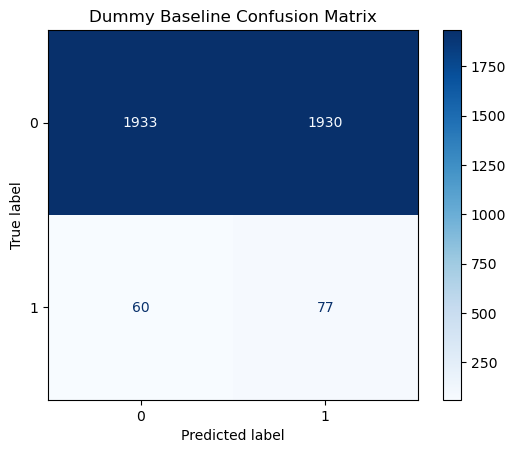

              precision    recall  f1-score   support

           0       0.97      0.50      0.66      3863
           1       0.04      0.56      0.07       137

    accuracy                           0.50      4000
   macro avg       0.50      0.53      0.37      4000
weighted avg       0.94      0.50      0.64      4000



In [19]:
dummy = DummyClassifier(strategy="uniform", random_state=seed)
dummy.fit(X_train, y_train)
dummy_accuracy = dummy.score(X_test, y_test)
dummy_y_pred = dummy.predict(X_test)

print("Dummy Accuracy")
print(dummy_accuracy)

cm = confusion_matrix(y_test, dummy_y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.title("Dummy Baseline Confusion Matrix")
plt.show()

print(classification_report(y_test, dummy_y_pred))

<hr>

The result from Cross Validation
[array([0.82373868, 0.81921087, 0.81403622, 0.82244502, 0.81209573,
       0.81694696, 0.81694696, 0.81662354, 0.8162407 , 0.81429958]), array([0.98544631, 0.98835705, 0.98803364, 0.98771022, 0.98868047,
       0.99062096, 0.98997413, 0.98900388, 0.98608864, 0.98802976]), array([0.99773609, 0.99708926, 0.99773609, 0.99676585, 0.99805951,
       0.99741268, 0.99838292, 0.99902975, 0.99902944, 1.        ]), array([0.83602846, 0.84508409, 0.82923674, 0.8431436 , 0.82341527,
       0.83311772, 0.82147477, 0.83764554, 0.81494662, 0.82174054]), array([0.9427555 , 0.94760673, 0.94113842, 0.9450194 , 0.93628719,
       0.94760673, 0.93467012, 0.93952135, 0.92720802, 0.94176642]), array([0.53298836, 0.75743855, 0.77910737, 0.73188875, 0.74741268,
       0.76099612, 0.75970246, 0.76520052, 0.72889033, 0.77483015])]


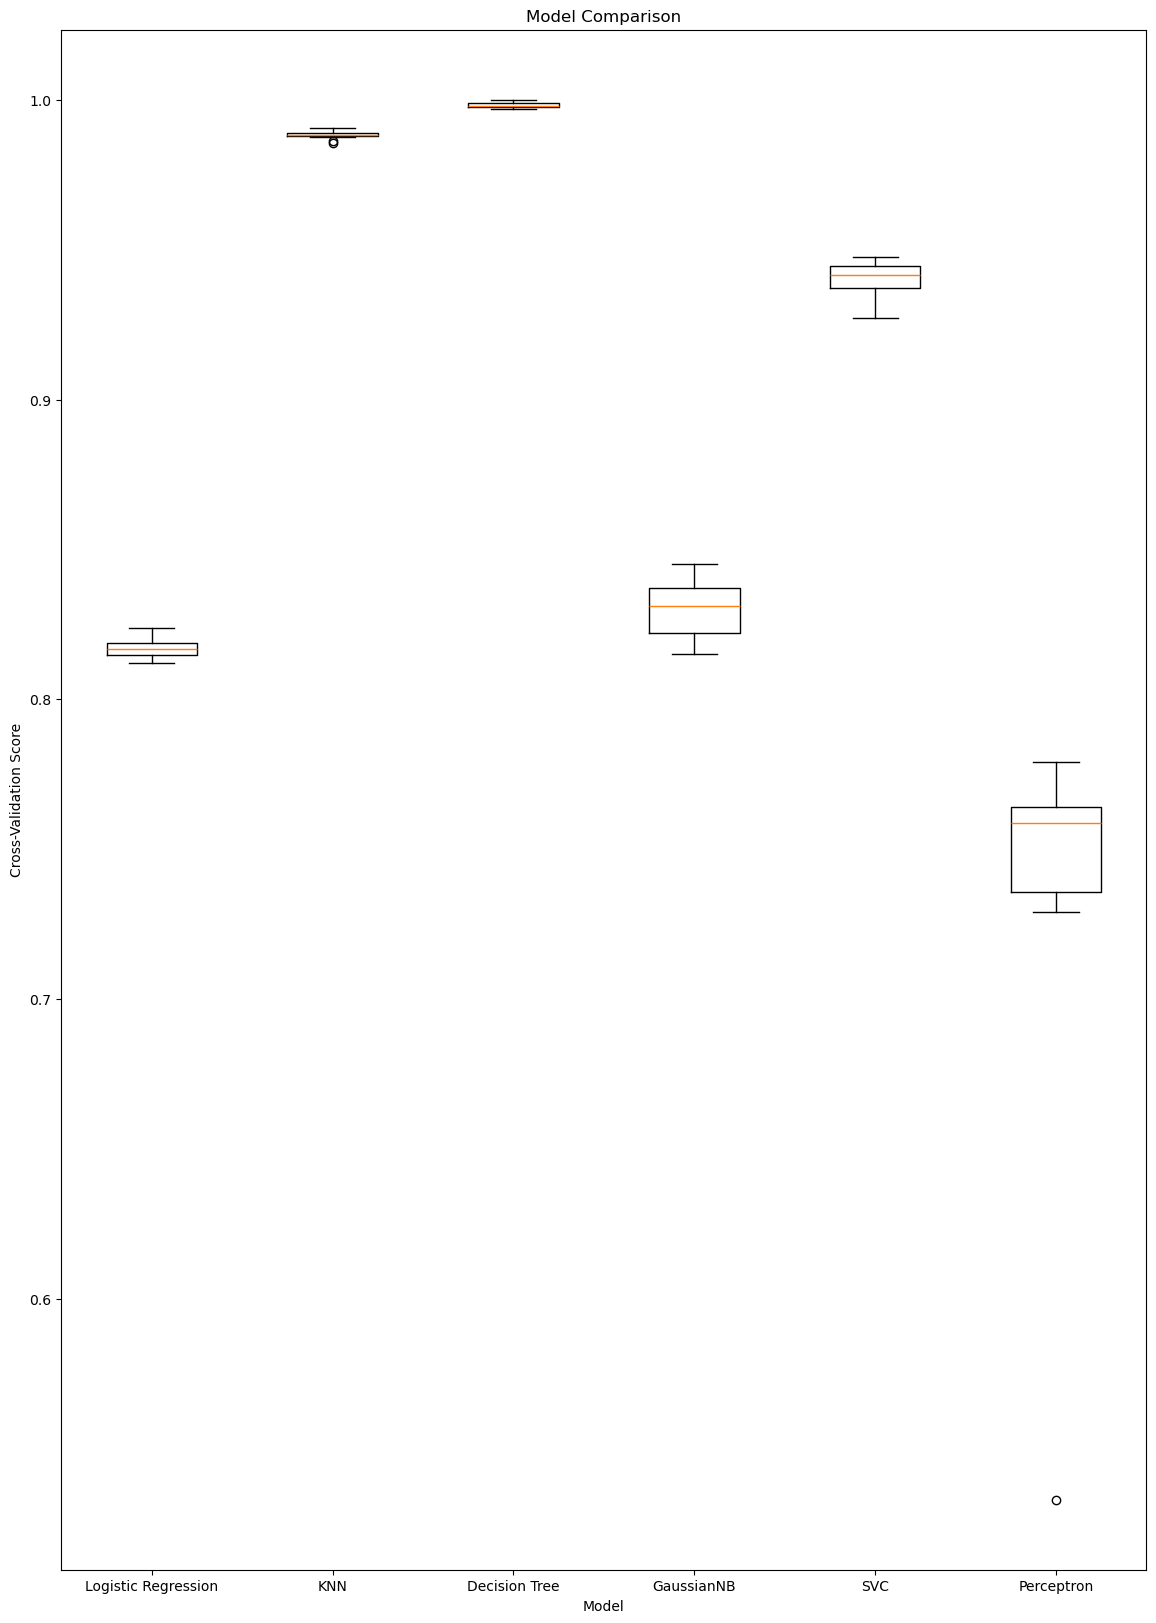

In [20]:
# Define models
models = {
    "Logistic Regression": LogisticRegression(), 
    "KNN": KNeighborsClassifier(), 
    "Decision Tree": DecisionTreeClassifier(),
    "GaussianNB": GaussianNB(),
    "SVC": SVC(),
    "Perceptron": Perceptron()
}

# Initialize results list to store cross-validation results for each model
results = []

# Loop over each model, run cross-validation, and collect the scores
for model in models.values():
    kf = KFold(n_splits=10, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kf)
    results.append(cv_results)

# Plot the results after all models have been evaluated
print("The result from Cross Validation")
print(results)
plt.figure(figsize=(14,20))
plt.boxplot(results, labels=models.keys())
plt.xlabel("Model")
plt.ylabel("Cross-Validation Score")
plt.title("Model Comparison")
plt.show()

# 5. Evaluating the models' performance using the testing data

Logistic Regression Test Set Accuracy: 0.82


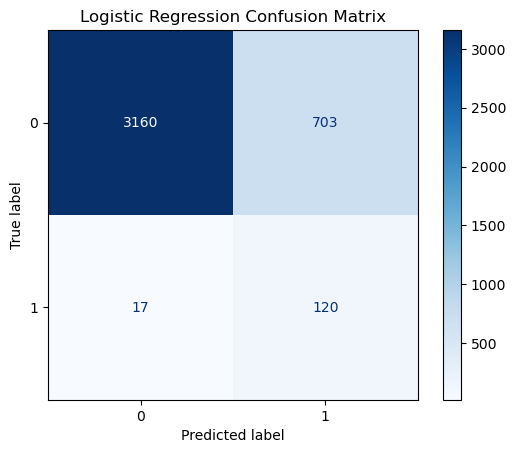

              precision    recall  f1-score   support

           0       0.99      0.82      0.90      3863
           1       0.15      0.88      0.25       137

    accuracy                           0.82      4000
   macro avg       0.57      0.85      0.57      4000
weighted avg       0.97      0.82      0.88      4000

KNN Test Set Accuracy: 0.9715


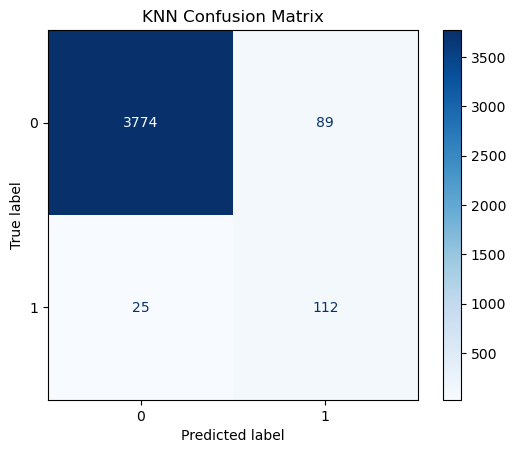

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      3863
           1       0.56      0.82      0.66       137

    accuracy                           0.97      4000
   macro avg       0.78      0.90      0.82      4000
weighted avg       0.98      0.97      0.97      4000

Decision Tree Test Set Accuracy: 0.9925


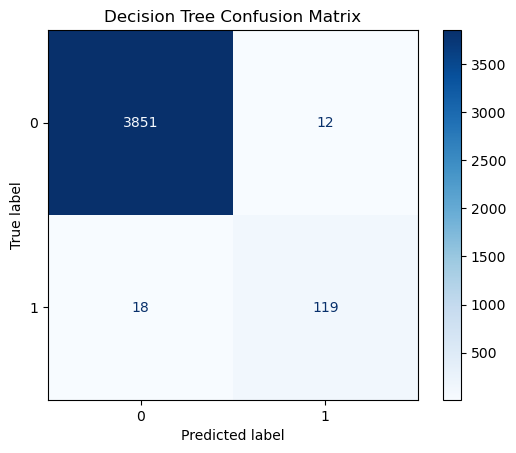

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3863
           1       0.91      0.87      0.89       137

    accuracy                           0.99      4000
   macro avg       0.95      0.93      0.94      4000
weighted avg       0.99      0.99      0.99      4000

GaussianNB Test Set Accuracy: 0.8475


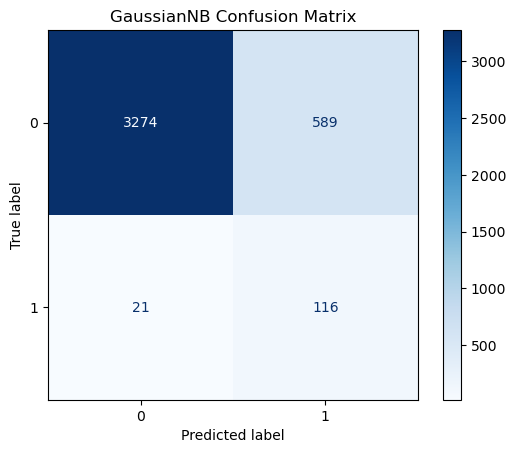

              precision    recall  f1-score   support

           0       0.99      0.85      0.91      3863
           1       0.16      0.85      0.28       137

    accuracy                           0.85      4000
   macro avg       0.58      0.85      0.60      4000
weighted avg       0.97      0.85      0.89      4000

SVC Test Set Accuracy: 0.933


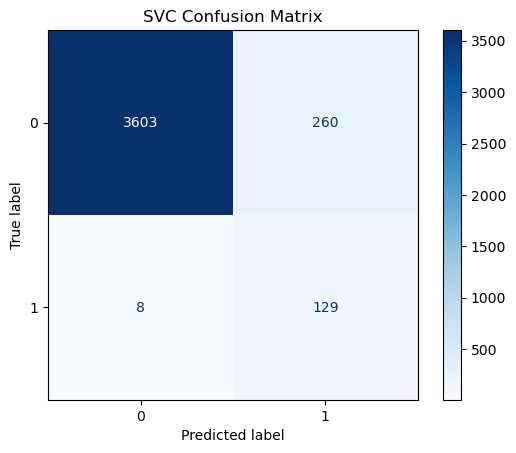

              precision    recall  f1-score   support

           0       1.00      0.93      0.96      3863
           1       0.33      0.94      0.49       137

    accuracy                           0.93      4000
   macro avg       0.66      0.94      0.73      4000
weighted avg       0.97      0.93      0.95      4000

Perceptron Test Set Accuracy: 0.819


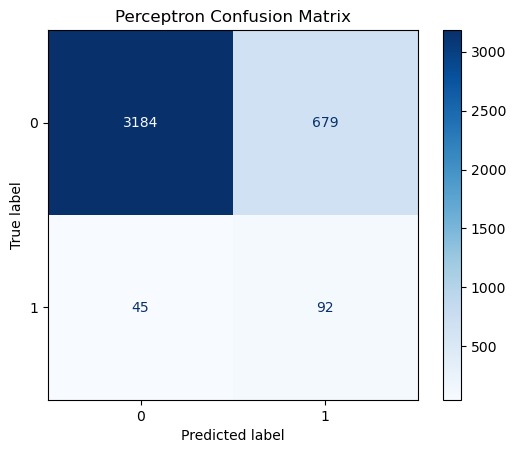

              precision    recall  f1-score   support

           0       0.99      0.82      0.90      3863
           1       0.12      0.67      0.20       137

    accuracy                           0.82      4000
   macro avg       0.55      0.75      0.55      4000
weighted avg       0.96      0.82      0.87      4000



In [21]:
for name, model in models.items():
    model.fit(X_train, y_train)
    model_score = model.score(X_test, y_test)
    model_y_pred = model.predict(X_test)
    
    print("{} Test Set Accuracy: {}".format(name, model_score))
    cm = confusion_matrix(y_test, model_y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap="Blues")
    plt.title(f"{name} Confusion Matrix")
    plt.show()

    print(classification_report(y_test, model_y_pred))
    print("="*50)

# 6. Tuning the model for better results

# 7. Conclusion